In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
import spacy
from spacy import displacy
import plotly.express as px
from nltk.util import ngrams

In [2]:
file_path = r"D:\Resume Classification\resume_dataset.xlsx"

# Load the Excel file into a DataFrame

df = pd.read_excel(file_path, engine='openpyxl')


In [3]:
df.head()

Text    Category
0  Anubhav Kumar Singh  To work in a globally com...  Peoplesoft
1  Profile Summary:7+ years of experience in impl...  Peoplesoft
2  PeopleSoft Database Administrator             ...  Peoplesoft
3  MuraliExperience Summary I have 6 years of exp...  Peoplesoft
4  Priyanka Ramadoss61/46, MountPleasant, Coonoor...  Peoplesoft

In [4]:
df.shape

(79, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [6]:
df.isnull().sum()

Text        0
Category    0
dtype: int64

In [7]:
df['Category'].value_counts()

React Developer    24
Workday            21
Peoplesoft         20
SQL Developer      14
Name: Category, dtype: int64

In [8]:
# Rename categories by removing spaces and replacing them with underscores
df['Category'] = df['Category'].apply(lambda x: x.replace(" ", "_"))

In [9]:
df['Category'].value_counts()

React_Developer    24
Workday            21
Peoplesoft         20
SQL_Developer      14
Name: Category, dtype: int64

### Text Analysis

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

In [11]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

In [12]:
df_copy =df.copy()

In [13]:
## Calculate word count

df_copy['Word_Count'] = df_copy['Text'].apply(lambda x: len(str(x).split()))

In [14]:
## Calculate character count (excluding spaces)

df_copy['Char_Count'] = df_copy['Text'].apply(lambda x: len(re.sub(r'\s+', '', str(x))))

In [15]:
# Calculate unique word count

df_copy['Unique_Word_Count'] = df_copy['Text'].apply(lambda x: len(set(str(x).split())))

In [16]:
# Calculate stopword count and extract stopwords

stop_words = set(stopwords.words('english'))
df_copy['Stopword_Count'] = df_copy['Text'].apply(lambda x: len([word for word in word_tokenize(x.lower()) if word in stop_words]))
df_copy['Stopwords'] = df_copy['Text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word in stop_words])

In [17]:
df_copy.head()

Text    Category  Word_Count  \
0  Anubhav Kumar Singh  To work in a globally com...  Peoplesoft         844   
1  Profile Summary:7+ years of experience in impl...  Peoplesoft         853   
2  PeopleSoft Database Administrator             ...  Peoplesoft         718   
3  MuraliExperience Summary I have 6 years of exp...  Peoplesoft         484   
4  Priyanka Ramadoss61/46, MountPleasant, Coonoor...  Peoplesoft         543   

   Char_Count  Unique_Word_Count  Stopword_Count  \
0        6033                455             190   
1        6284                466             189   
2        5122                392             180   
3        3374                217             117   
4        4175                357             127   

                                           Stopwords  
0  [to, in, a, on, that, the, of, the, and, a, an...  
1  [of, in, and, and, in, and, of, the, in, and, ...  
2  [to, in, a, and, while, my, and, with, the, in...  
3  [i, have, of, in, and, in, and, and, on, and, ...  
4  [as, a, by, in, a, and, and, the, and, through...

In [18]:
df_copy['Stopwords'][0]

['to',
 'in',
 'a',
 'on',
 'that',
 'the',
 'of',
 'the',
 'and',
 'a',
 'and',
 'with',
 'on',
 'and',
 'in',
 'to',
 'such',
 'as',
 'of',
 'and',
 'for',
 'on',
 'as',
 'for',
 'of',
 'to',
 'and',
 'of',
 'as',
 'by',
 'of',
 'in',
 'a',
 'is',
 'by',
 'on',
 'and',
 'through',
 'of',
 'and',
 'and',
 'through',
 'and',
 'of',
 'from',
 'and',
 'to',
 'on',
 'for',
 'on',
 'and',
 'to',
 'and',
 'of',
 'of',
 'on',
 'on',
 'in',
 'in',
 'of',
 'and',
 'in',
 'in',
 'in',
 'and',
 'in',
 'and',
 'for',
 'to',
 'and',
 'and',
 'for',
 'on',
 'by',
 'the',
 'of',
 'and',
 'and',
 'other',
 'for',
 'to',
 'of',
 'for',
 'on',
 'to',
 'and',
 'for',
 'and',
 'for',
 'up',
 'and',
 'on',
 'and',
 'and',
 'in',
 'for',
 'with',
 'and',
 'to',
 'as',
 'and',
 'with',
 'on',
 'and',
 'through',
 'and',
 'in',
 'and',
 'with',
 'in',
 'of',
 'in',
 'through',
 'in',
 'on',
 'both',
 'with',
 'of',
 'and',
 'from',
 'in',
 'of',
 'in',
 'on',
 'and',
 'of',
 'and',
 'and',
 'and',
 'and',
 '

In [19]:
# Categories of interest with spaces replaced by underscores
categories_of_interest = ['Peoplesoft', 'React_Developer', 'SQL_Developer', 'Workday']

# Filter the DataFrame to include only categories of interest
df_filtered = df_copy[df_copy['Category'].isin(categories_of_interest)]

# Calculate average metrics for each category of interest
average_metrics = df_filtered.groupby('Category')[['Word_Count', 'Char_Count', 'Unique_Word_Count', 'Stopword_Count']].mean()

# Display average metrics for categories of interest
print("Average Metrics by Category:")
print(average_metrics)

Average Metrics by Category:
                 Word_Count   Char_Count  Unique_Word_Count  Stopword_Count
Category                                                                   
Peoplesoft       829.750000  5838.900000         381.800000      211.200000
React_Developer  359.041667  2286.291667         233.625000       95.875000
SQL_Developer    540.571429  3451.857143         325.500000      145.142857
Workday          766.142857  5137.238095         431.952381      198.904762


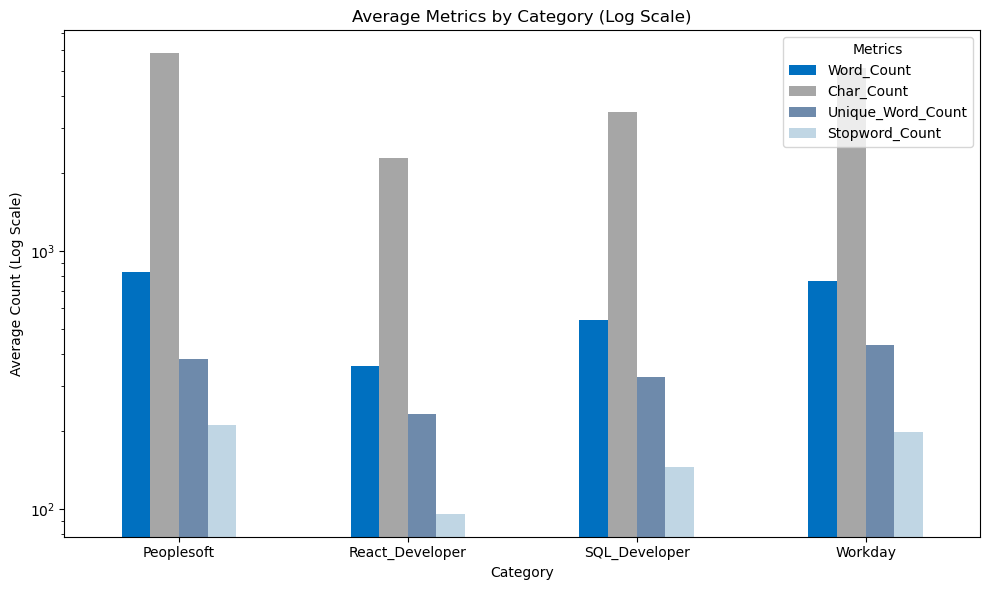

In [20]:
# Define a professional color palette with shades of blue and gray
professional_colors = ['#0070c0', '#a6a6a6', '#6e8aab', '#c0d6e4']

# Plotting the average metrics for each category with a log scale
average_metrics.plot(kind='bar', figsize=(10, 6), logy=True, color=professional_colors)
plt.title('Average Metrics by Category (Log Scale)')
plt.ylabel('Average Count (Log Scale)')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

### Text Preprocessing

In [21]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove special characters, numbers, and specific symbols like ǁ, :, /, (, ), comma
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)  # Removes all non-alphabetic characters
    text = re.sub(r'[•ǁ:/\(\),#,-]', '', text)  # Removes specific symbols including comma
    text = re.sub(r'\u2018|\u2019', '', text)  # Removes curly apostrophes
    
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(clean_text)  

In [22]:
# Display the entire first resume
pd.set_option('display.max_colwidth', None)
print(df[['Text', 'Cleaned_Text']].head(2))

### Exploratory Data Analysis (EDA)

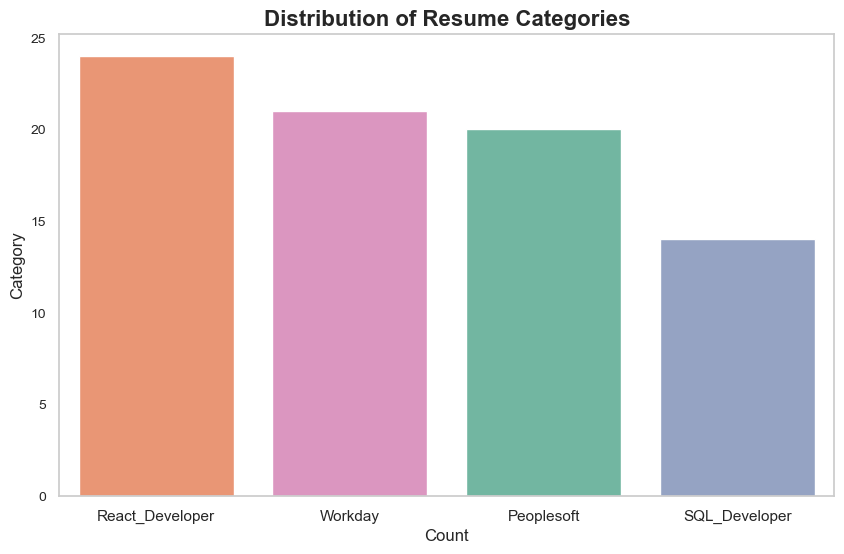

In [23]:
# Set the style to a more professional look
sns.set(style="whitegrid")

# Define a new color palette with better contrast
color_palette = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index, hue='Category', palette=color_palette, legend=False)
plt.title('Distribution of Resume Categories', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(visible=False)
plt.show()

### Pie Chart

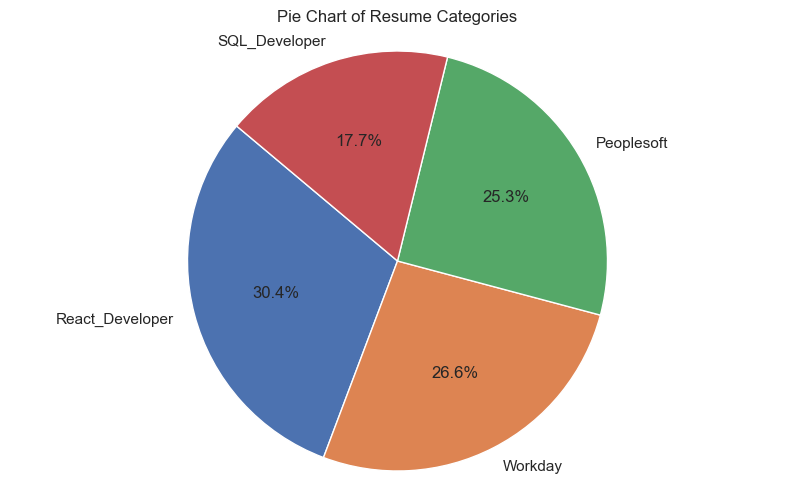

In [24]:
# Count the number of resumes in each category
category_counts = df['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Resume Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

###  Word Cloud for Each Category

In [25]:
from wordcloud import WordCloud

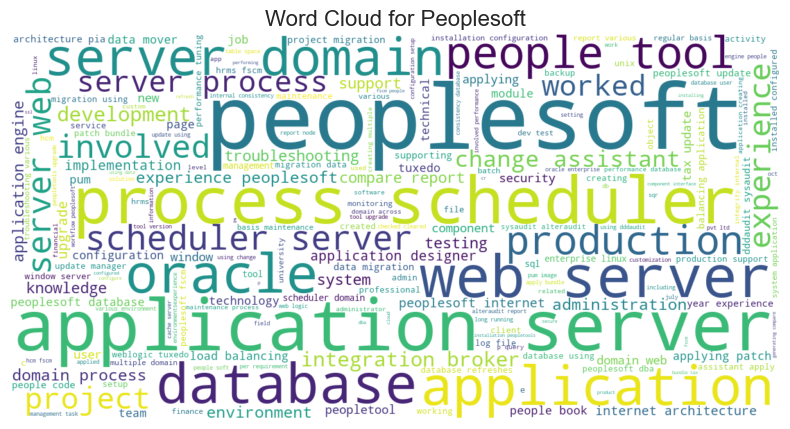

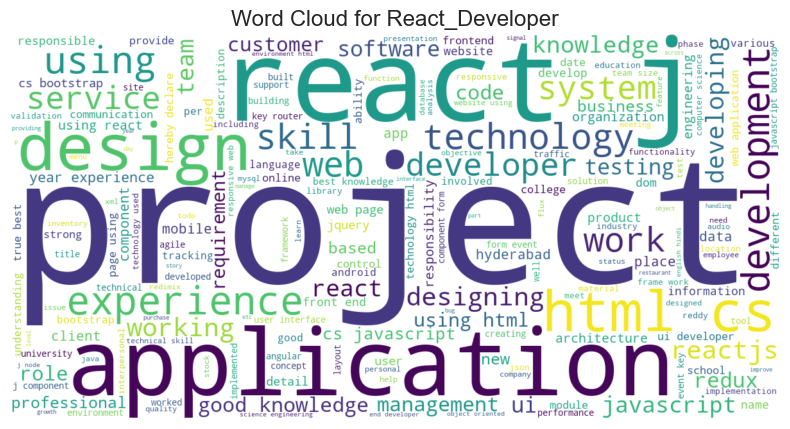

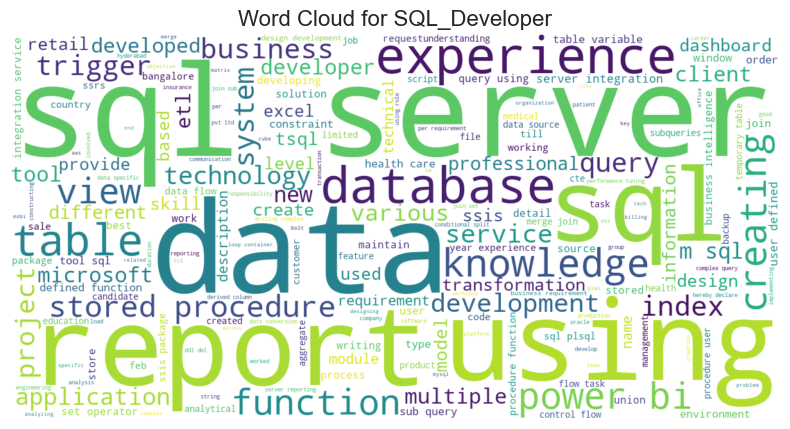

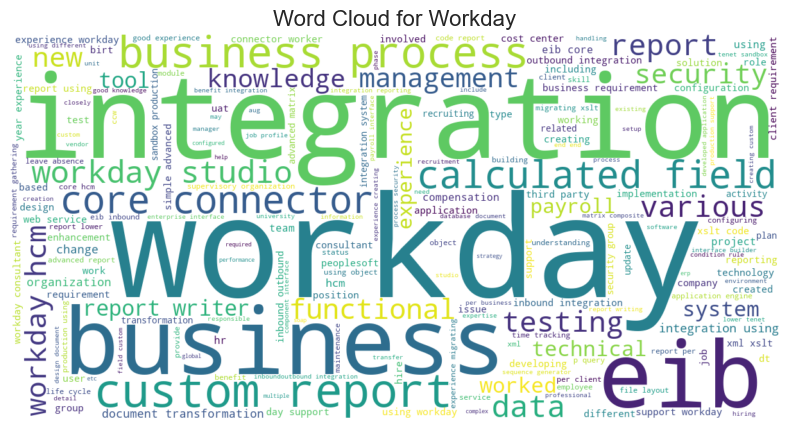

In [26]:
def generate_wordcloud(text, title, width=800, height=400):
    wordcloud = WordCloud(
        width=width, 
        height=height, 
        background_color='white', 
        colormap='viridis', 
        max_words=200, 
        contour_width=3, 
        contour_color='steelblue'
    ).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds for each category
for category in df['Category'].unique():
    text = ' '.join(df[df['Category'] == category]['Cleaned_Text'])
    generate_wordcloud(text, f'Word Cloud for {category}', width=1200, height=600)

### Word Frequency Bar Plot

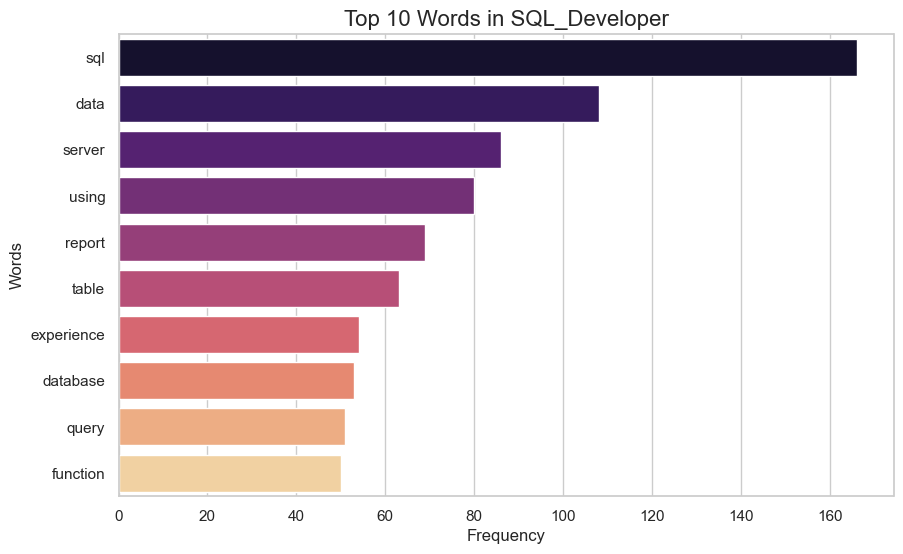

In [27]:
def plot_word_frequency(category, top_n=10):
    """
    Plot the top words and their frequencies for a specific category.
    
    Parameters:
        category (str): The category to analyze.
        top_n (int): The number of top words to display.
    """
    words = ' '.join(df[df['Category'] == category]['Cleaned_Text']).split()
    word_freq = Counter(words)
    top_words = word_freq.most_common(top_n)
    
    # Create a DataFrame for the top words and their frequencies
    top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
    
    plt.figure(figsize=(10, 6))
    
    # Plot the bar chart using seaborn with hue assigned to 'Word'
    sns.barplot(
        data=top_words_df, 
        x='Frequency', 
        y='Word', 
        hue='Word',  # Assign y to hue
        palette='magma', 
        orient='h', 
        legend=False  # Disable legend
    )
    
    plt.title(f'Top {top_n} Words in {category}', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Words', fontsize=12)
    plt.show()

# List of categories
categories = df['Category'].unique()

# Uncomment the lines below to generate word frequency plots for specific categories
for category in categories:
    # Uncomment the following line to generate word frequency plot for a specific category
     if category == 'SQL_Developer':  # Replace 'Peoplesoft' with the desired category
         plot_word_frequency(category)

### Bigram and Trigram Analysis

In [28]:
df['Category'].value_counts()

React_Developer    24
Workday            21
Peoplesoft         20
SQL_Developer      14
Name: Category, dtype: int64

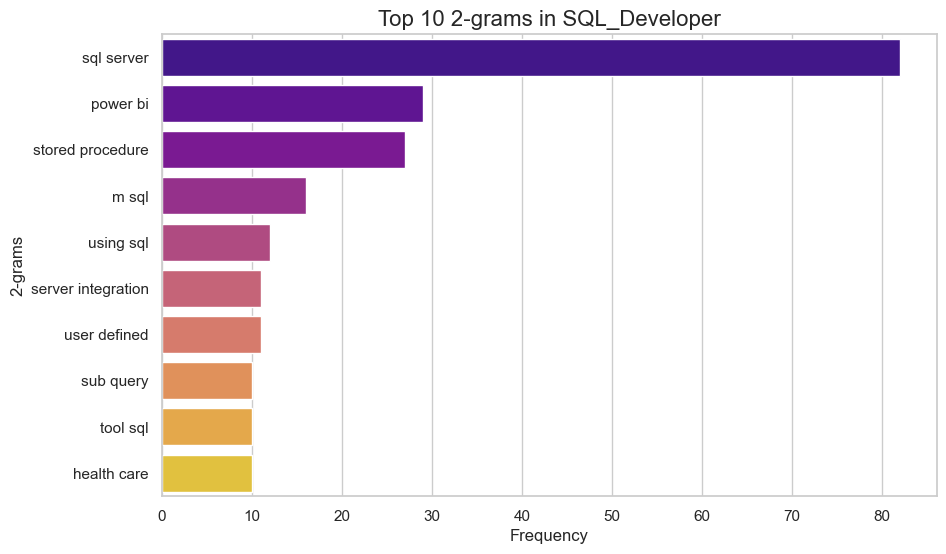

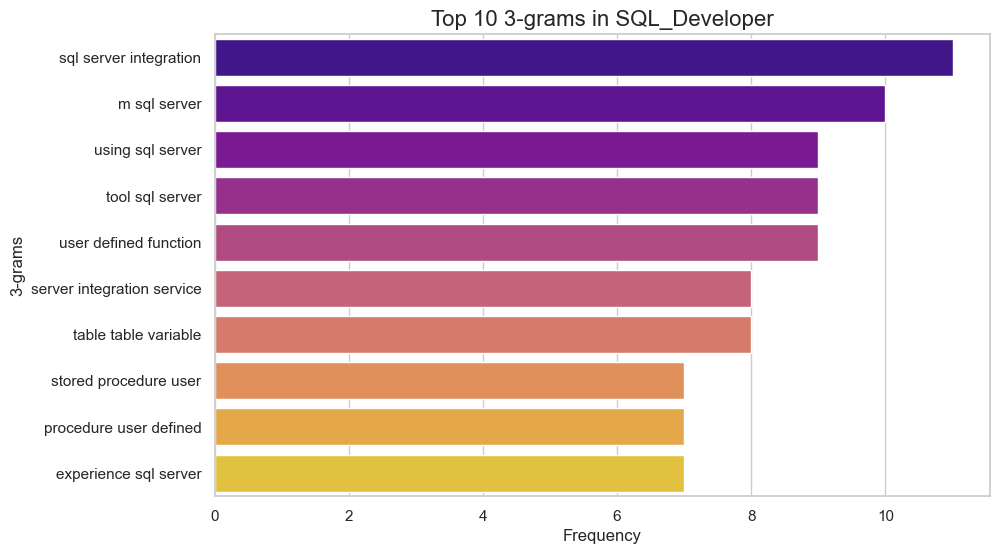

In [29]:
def plot_ngrams(category, n=2, top_n=10):
    """
    Plot the top n-grams (bigrams or trigrams) for a specific category.
    
    Parameters:
        category (str): The category to analyze.
        n (int): The value of n for n-grams (2 for bigrams, 3 for trigrams).
        top_n (int): The number of top n-grams to display.
    """
    text = ' '.join(df[df['Category'] == category]['Cleaned_Text'])
    tokens = word_tokenize(text)
    ngrams = list(nltk.ngrams(tokens, n))
    ngram_freq = Counter(ngrams)
    top_ngrams = ngram_freq.most_common(top_n)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=[count for ngram, count in top_ngrams], 
        y=[f"{' '.join(ngram)}" for ngram, count in top_ngrams], 
        hue=[f"{' '.join(ngram)}" for ngram, count in top_ngrams],  # Assign y to hue
        palette='plasma', 
        legend=False  # Disable legend
    )
    plt.title(f'Top {top_n} {n}-grams in {category}', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel(f'{n}-grams', fontsize=12)
    plt.show()

# List of categories
categories = df['Category'].unique()

# Uncomment the lines below to generate bigrams and trigrams for specific categories
for category in categories:
    # Uncomment the following lines to generate bigrams for a specific category
     if category == 'SQL_Developer':  # Replace 'Peoplesoft' with the desired category
         plot_ngrams(category, n=2)  # Bigrams
    
    # Uncomment the following lines to generate trigrams for a specific category
     if category == 'SQL_Developer':  # Replace 'Peoplesoft' with the desired category
         plot_ngrams(category, n=3)  # Trigrams

### Sentiment Analysis

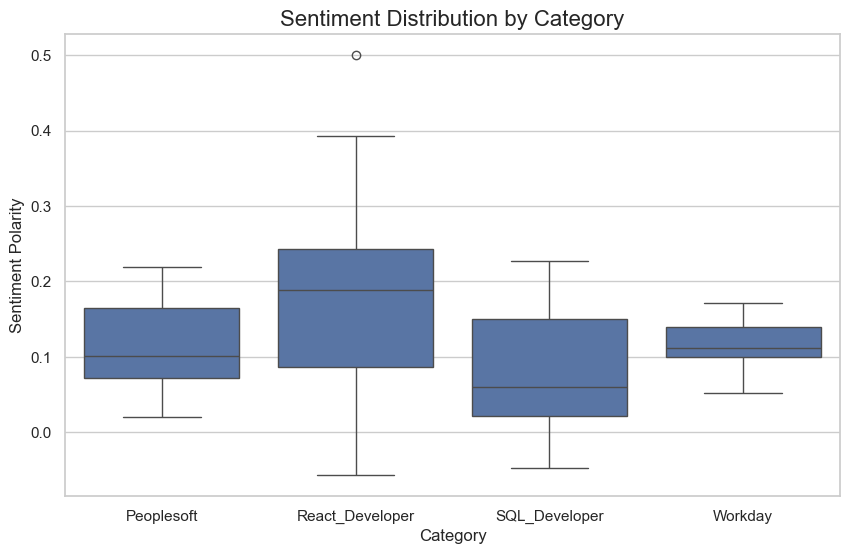

In [30]:
# Add sentiment column
df['Sentiment'] = df['Cleaned_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sentiment distribution by category
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='Category', y='Sentiment', data=df)

plt.title('Sentiment Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sentiment Polarity', fontsize=12)

plt.show()

### Advanced NLP Techniques

### Named Entity Recognition (NER)

In [31]:
# Load the larger SpaCy model
nlp = spacy.load('en_core_web_lg')


In [32]:
def visualize_ner(text, title="Named Entity Recognition"):
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    entity_df = pd.DataFrame(entities, columns=["Entity", "Label"])
    if not entity_df.empty:
        fig = px.bar(
            entity_df,
            x="Entity",
            color="Label",
            title=title,
            labels={"Entity": "Entity", "Label": "Entity Type"},
            color_discrete_sequence=px.colors.qualitative.Plotly
        )
        fig.update_layout(
            xaxis_title="Entity",
            yaxis_title="Frequency",
            template="plotly_white"
        )
        fig.show()
    else:
        print("No named entities found in the text.")


In [33]:
# Visualize NER for the second resume
second_resume = df['Cleaned_Text'][2]
visualize_ner(second_resume, title="NER for Second Resume")


### Function to Aggregate NER Results for a Category

### Dependency Parsing

In [34]:
def dependency_parsing(text):
    doc = nlp(text)
    for token in doc:
        print(f"Token: {token.text}, Dependency: {token.dep_}, Head: {token.head.text}")
sample_text = 'peoplesoft database administrator gangareddy professional objective work professional challenging environment best utilizing talent keeping abreast latest technical advancement field peoplesoft application dba derive utmost job satisfaction knowledge field become successful oracle peoplesoft application dba activitiesprofessional summaryhaving year experience peoplesoft application admindbaexperience creating configuring application server domainscreated multiple server domain separate host system access one database effective strategy performance tuningexperience application server administrationensured system availability implementing failover spreading multiple domain acrossmultiple hostspeoplesoft server administration expertise installation configuration setup management database peoplesoft internet architecture pia environment related processing objectsextensive experience applying tax update patch fix bundle maintenance packsexperienced peoplesoft application administrator including performance problem sqr report app engine tuning sql index creation migration change managementextensive experience refreshing development qa production database migrating change qa production evaluating required patch applying peoplesoft system timely basisexperience report management monitoring batch environmentpeoplesoft server administration expertise installation configuration setup management database peoplesoft internet architecture pia environment related processing objectsexperience monitoring scheduling jobsexperience security administrationexperience creating managing batch environmenttaking scheduled backup per backup strategy using rmanconfigured maintaining rman take backup oracle sql server databasesexperienced taking regular offline online logical backupsexperience backup like logical backup exp imp datapumpsuccessfully installed configured oracle s peoplesoft environmentinvolved configuration ssl certificate weblogic csuccessfully installed applied pum peoplesoft update managertechnical skillserp package peoplesoft hrmsfscmcrmcshcmportal people tool version peopletools application server bea tuxedo oracle tuxedo cweb server bea weblogic oracle weblogic cdatabases oracle gr gr mssql server roperating system rhel oel oel window rprofessional experience working emergtech business solution india pvt ltd may till date client amerit fleet solution duration sep tilldatabase mssql server role peoplesoft administratordbaenvironment peoplesoft hcm fscm crm elm c portal pt v oracle ggr cr rhel window r serversproject kc managed servicesresponsibilities successfully installed configured web logic server application server component database server window operating systemssuccessfully installed configured oracle s peoplesoft environment.involved installation application database environments.involved configuration ssl certificate weblogic 10.3.working daily production development administration activities.perform pro-active monitoring.involved supporting team member various projects.successfully applied peoplesoft update managerpum.handled application management task like applying patch & fixes.cloning production server testing purpose like applying patch bundle . installed peoplesoft database application nt unix operating systemsinstalled configured oracle database updated database applying updatesfixespatches backup timely basis kept record updatesfixespatchesconfigured application server web server & batch process scheduler server.configured window development client connect 2-tier 3-tier database development administration purposesprofessional experience client db duration may 2017-aug 2019database db2role peoplesoft administratordbaenvironment peoplesoft fscm pt v8 . 8.548.57 db2 rhel window 2008 r2 serversproject db managed servicesresponsibilities configured application server webservers & batch process scheduler server.extensively used psadmin utility administer create & delete application server process scheduler server.monitored server client queue status several tuxedo domainschanged psappsrv.cfgpsprcs.cfg configuration file performance tuning specific environment.checked cleared application server cache regular basis maintenance process.setup trace log various level like logfence parameter domain setting section appsrv.cfg file trace log configuration manager sql people code ae etc enable trace parameter psappserv.cfg psprcs.cfg file application server process scheduler created multiple web logic server instancestaking care security related issues.adding additional security group mapping.taking care dr setup snap shot backup.mutli factor authentication setup.monitoring process helping customer term troubleshooting performance gaining.take care migration script executions.document preparation issue troubleshooting step issue occurred .'

# Example
dependency_parsing(sample_text)

Token: peoplesoft, Dependency: amod, Head: database
Token: database, Dependency: compound, Head: environment
Token: administrator, Dependency: nmod, Head: environment
Token: gangareddy, Dependency: nmod, Head: environment
Token: professional, Dependency: amod, Head: work
Token: objective, Dependency: amod, Head: work
Token: work, Dependency: nmod, Head: environment
Token: professional, Dependency: amod, Head: environment
Token: challenging, Dependency: amod, Head: environment
Token: environment, Dependency: dep, Head: become
Token: best, Dependency: advmod, Head: utilizing
Token: utilizing, Dependency: acl, Head: environment
Token: talent, Dependency: compound, Head: keeping
Token: keeping, Dependency: xcomp, Head: utilizing
Token: abreast, Dependency: advmod, Head: keeping
Token: latest, Dependency: amod, Head: application
Token: technical, Dependency: amod, Head: advancement
Token: advancement, Dependency: compound, Head: field
Token: field, Dependency: compound, Head: peoplesoft
Tok

### Noun and Verb Analysis

In [35]:
from collections import defaultdict

def extract_nouns_verbs(text):
    """
    Extract nouns and verbs from the text using POS tagging.
    """
    doc = nlp(text)
    nouns = []
    verbs = []
    for token in doc:
        if token.pos_ == 'NOUN':  # Extract nouns
            nouns.append(token.text)
        elif token.pos_ == 'VERB':  # Extract verbs
            verbs.append(token.text)
    return nouns, verbs

# Add noun and verb columns to the dataframe
df['Nouns'] = df['Cleaned_Text'].apply(lambda x: extract_nouns_verbs(x)[0])
df['Verbs'] = df['Cleaned_Text'].apply(lambda x: extract_nouns_verbs(x)[1])

# Display the first resume with nouns and verbs
print(df[['Cleaned_Text', 'Nouns', 'Verbs']].head(1))

In [36]:
df['Category'].unique()

array(['Peoplesoft', 'React_Developer', 'SQL_Developer', 'Workday'],
      dtype=object)

### Plot Top Nouns and Verbs

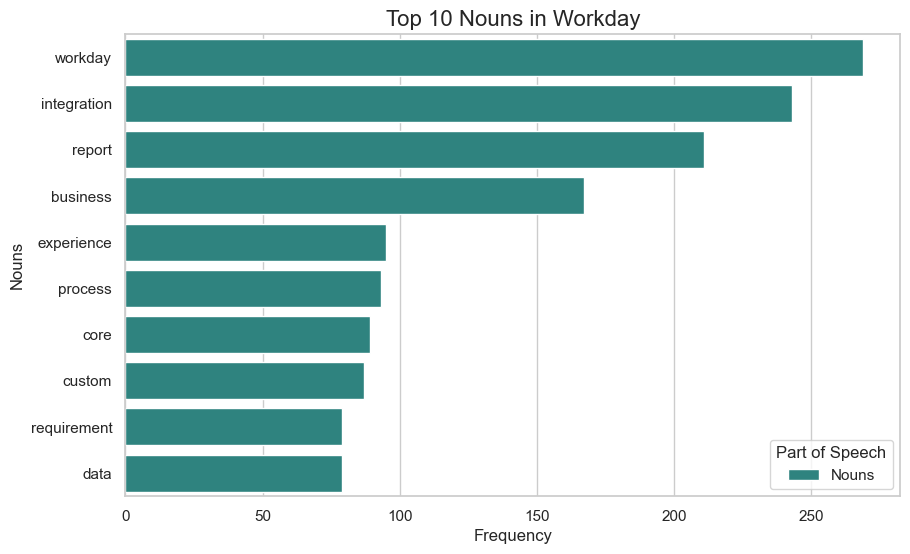

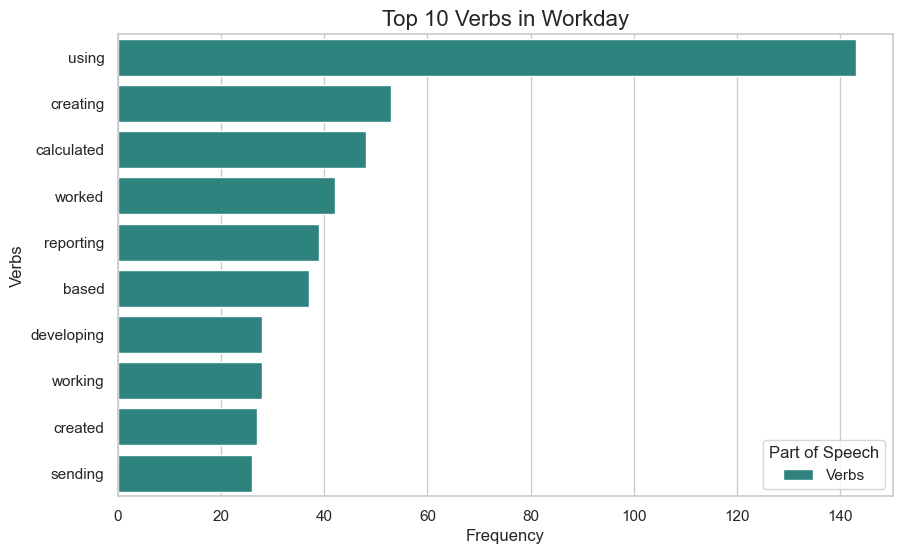

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

def plot_top_pos(category, pos_type='nouns', top_n=10):
    """
    Plot the top nouns or verbs for a specific category.
    
    Parameters:
        category (str): The category to analyze.
        pos_type (str): 'nouns' or 'verbs'.
        top_n (int): The number of top words to display.
    """
    if pos_type == 'nouns':
        pos_list = df[df['Category'] == category]['Nouns'].explode()
    elif pos_type == 'verbs':
        pos_list = df[df['Category'] == category]['Verbs'].explode()
    else:
        raise ValueError("pos_type must be 'nouns' or 'verbs'")
    
    pos_freq = Counter(pos_list)
    top_pos = pos_freq.most_common(top_n)
    
    # Convert to DataFrame for Seaborn
    df_top_pos = pd.DataFrame(top_pos, columns=['Word', 'Frequency'])
    df_top_pos['Type'] = pos_type.capitalize()  # Add a type column for hue
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_top_pos, x='Frequency', y='Word', hue='Type', orient='h', palette='viridis')
    plt.title(f'Top {top_n} {pos_type.capitalize()} in {category}', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel(pos_type.capitalize(), fontsize=12)
    plt.legend(title='Part of Speech')
    plt.show()


# Example: Plot top nouns and verbs for a specific category
category = 'Workday'
plot_top_pos(category, pos_type='nouns')  # Top nouns
plot_top_pos(category, pos_type='verbs')  # Top verbs


### Skill Frequency Analysis

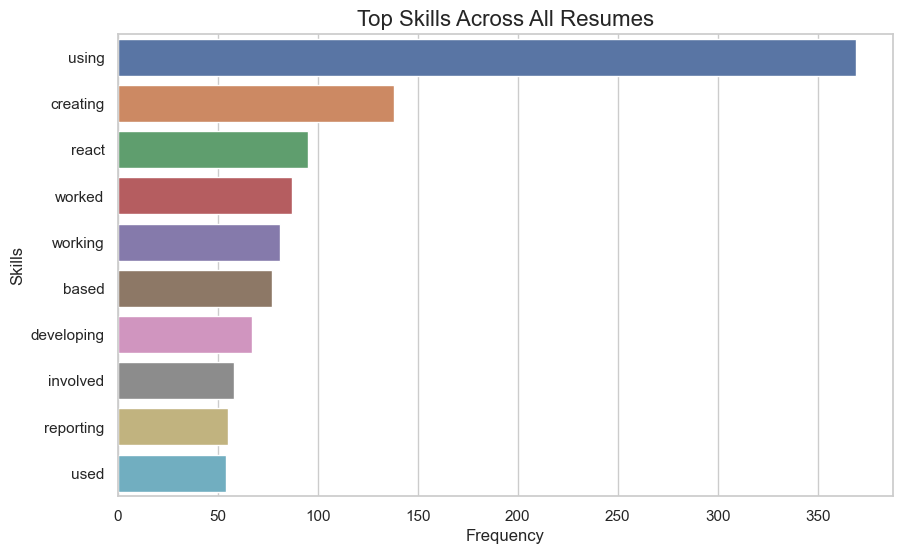

In [38]:
# Combine all nouns from all resumes
all_nouns = df['Verbs'].explode()
noun_freq = Counter(all_nouns)

# Plot top skills
top_nouns = noun_freq.most_common(10)
plt.figure(figsize=(10, 6))
# Adjusting the plot to remove the palette warning
sns.barplot(x=[count for word, count in top_nouns], 
            y=[word for word, count in top_nouns], 
            hue=[word for word, count in top_nouns],  # Adding hue to match the warning guidance
            legend=False)  # Disable legend since it is not meaningful here

plt.title('Top Skills Across All Resumes', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Skills', fontsize=12)
plt.show()

In [39]:
df.head()

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Anubhav Kumar Singh  To work in a globally competitive environment on   challenging assignments that shall yield the   twin benefits of the job satisfaction and a steady-paced   professional growth.   Professional Experience 06/2019 - CurrentHCLCurrent Role: System Admin OffshoreSkills : Shell Scripting, Linux , PeopleSoft Administration , GithubManaging PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS.Involved in Day to Day activities such as Project Migration, Database Refresh, System admin changes, Tax updates etc.Troubleshooting of various servers like application servers, Web Servers, Process Scheduler Servers.Applying Tuxedo and WebLogic Middleware CPU patches for various applications.Working on shell scripting used as integration method for exchange of files to external systemsInstallation and troubleshooting of 2-tier setup as per requirement.Reviewing Vulnerabilities reported by Security Teams.Renewal of SSL in Weblogic.Vulnerability remediation whenever a vulnerability is report by RMIS team.Worked on PUM (PeopleSoft Update Manager) and installation through DPK.Working Knowledge of Ansible and Docker.Developing new Shell scripts and troubleshooting Shell Script failures. 07/2017- 06/2019TechMahindraRole/Project: Application Support through Automation/Devops Tools and PeopleSoft AdminSkills : Shell Scripting, Linux , PeopleSoft Administration, Jenkins, AnsibleProject 1: People Tools 8.55 Upgrade & HCM 9.2 Application UpgradeProject 2: Migration of Applications from NTT Cloud and On-premises to AWS CloudWorked on shell scripting for various application requirement.Working on Ansible and Jenkins to automated start/stop and various activities of application.Basic knowledge of Docker.Applying SSL certificates on new released applications.Worked on Elastic Search Configuration in PeopleSoft.Gained knowledge in AWS Resources..Strong understanding of Unix architecture/Command and trouble shooting in Unix/Linux platform.Efficient in using Configuration Management & Deployment Tool like Ansible.Good experience in job scheduling via crontab and IBM Tivoli Workload Scheduler (TWS).Having good knowledge in automation using shell scripting Continuous integration management using Jenkins, installing and configuring Jenkins.Responsible for writing Ansible playbook to perform various taskManaged administration tasks installation, configuration, applications, troubleshooting, and performance related issue.Applying Tuxedo and WebLogic CPU patches for various applications.Working on Vulnerabilities reported by Security Teams.Reviewing the platform certification information of products, platforms, database servers, web and application servers, browsers, and other products for PeopleTools 8.55.Server Migration to AWS (Amazon Web Service).Installation of PeopleSoft server components Application Servers, Process Scheduler Servers, Tuxedo, Web logic Servers for New release PeopleTools on Unix/Linux Servers.Applying latest patch to PeopleTools.Installing and configuring Change assistant for various upgrade passes.Creating and running PeopleTools Upgrade Job for PeopleTools 8.55 Upgrade.Setting up Performance monitor.Creating new app, web and process scheduler domai

In [40]:
df['Sentiment'].head(20)

0     0.066762
1     0.219216
2     0.205556
3     0.020330
4     0.090625
5     0.068182
6     0.096670
7     0.091146
8     0.057317
9     0.103706
10    0.075203
11    0.036095
12    0.120334
13    0.073282
14    0.158182
15    0.162338
16    0.128788
17    0.199394
18    0.189276
19    0.168687
Name: Sentiment, dtype: float64

In [41]:
df['Category'].unique()

array(['Peoplesoft', 'React_Developer', 'SQL_Developer', 'Workday'],
      dtype=object)

# Model Building

## Logistic Regression (OvR)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


One-vs-Rest (OvR) Results:
Training Accuracy: 1.0000
Testing Accuracy: 0.9375

Classification Report (Testing Data):
                 precision    recall  f1-score   support

     Peoplesoft       1.00      0.80      0.89         5
React_Developer       0.86      1.00      0.92         6
  SQL_Developer       1.00      1.00      1.00         2
        Workday       1.00      1.00      1.00         3

       accuracy                           0.94        16
      macro avg       0.96      0.95      0.95        16
   weighted avg       0.95      0.94      0.94        16



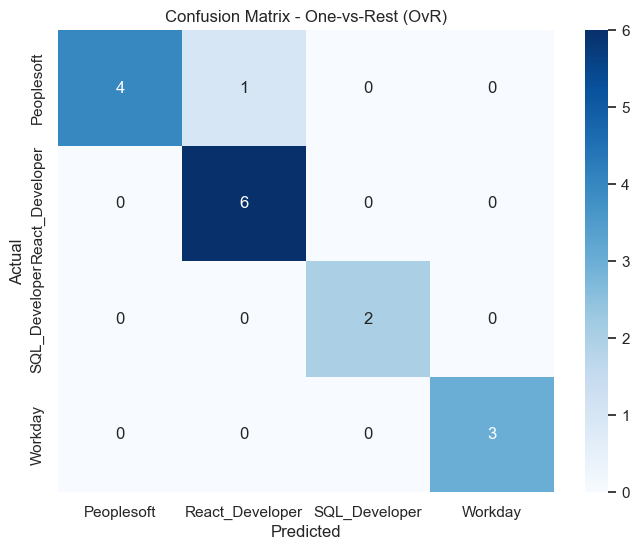


OvR Probabilities:
   Peoplesoft  React_Developer  SQL_Developer   Workday           Actual  \
0    0.195936         0.483758       0.158250  0.162056  React_Developer   
1    0.561358         0.164406       0.138063  0.136173       Peoplesoft   
2    0.188739         0.459154       0.171362  0.180744  React_Developer   
3    0.138246         0.614338       0.124100  0.123316  React_Developer   
4    0.274240         0.332003       0.186585  0.207172       Peoplesoft   

         Predicted  
0  React_Developer  
1       Peoplesoft  
2  React_Developer  
3  React_Developer  
4  React_Developer  

One-vs-Rest (OvR) Model Training and Evaluation Complete.


In [43]:


# Step 1: Preprocess the Data
ovr_texts = df['Cleaned_Text']
ovr_categories = df['Category']

# Convert text to TF-IDF features
ovr_vectorizer = TfidfVectorizer(lowercase=True, max_features=5000)
ovr_X = ovr_vectorizer.fit_transform(ovr_texts)

# Encode categories into numerical labels
ovr_label_encoder = LabelEncoder()
ovr_y = ovr_label_encoder.fit_transform(ovr_categories)

# Split data
ovr_X_train, ovr_X_test, ovr_y_train, ovr_y_test = train_test_split(ovr_X, ovr_y, test_size=0.2, random_state=42)

# Step 2: Train and Evaluate OvR Model
ovr_classifier = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
ovr_classifier.fit(ovr_X_train, ovr_y_train)

# Predict on training and testing data
ovr_y_train_pred = ovr_classifier.predict(ovr_X_train)
ovr_y_test_pred = ovr_classifier.predict(ovr_X_test)

# Accuracy scores
ovr_train_accuracy = accuracy_score(ovr_y_train, ovr_y_train_pred)
ovr_test_accuracy = accuracy_score(ovr_y_test, ovr_y_test_pred)

# Classification report
print("\nOne-vs-Rest (OvR) Results:")
print(f"Training Accuracy: {ovr_train_accuracy:.4f}")
print(f"Testing Accuracy: {ovr_test_accuracy:.4f}")
print("\nClassification Report (Testing Data):")
print(classification_report(ovr_y_test, ovr_y_test_pred, target_names=ovr_label_encoder.classes_))

# Confusion Matrix
ovr_cm = confusion_matrix(ovr_y_test, ovr_y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(ovr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=ovr_label_encoder.classes_, yticklabels=ovr_label_encoder.classes_)
plt.title('Confusion Matrix - One-vs-Rest (OvR)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Probabilities for OvR
ovr_y_proba = ovr_classifier.predict_proba(ovr_X_test)
ovr_proba_df = pd.DataFrame(ovr_y_proba, columns=ovr_label_encoder.classes_)
ovr_proba_df['Actual'] = ovr_label_encoder.inverse_transform(ovr_y_test)
ovr_proba_df['Predicted'] = ovr_label_encoder.inverse_transform(ovr_y_test_pred)

print("\nOvR Probabilities:")
print(ovr_proba_df.head())

print("\nOne-vs-Rest (OvR) Model Training and Evaluation Complete.")


## Deep Learning

In [44]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Encode categories
dl_label_encoder = LabelEncoder()
dl_y = dl_label_encoder.fit_transform(df["Category"])
dl_num_classes = len(dl_label_encoder.classes_)
dl_y = to_categorical(dl_y, dl_num_classes)

# Tokenize text
dl_max_words = 5000
dl_max_len = 200
dl_tokenizer = Tokenizer(num_words=dl_max_words)
dl_tokenizer.fit_on_texts(df["Cleaned_Text"])
dl_x = dl_tokenizer.texts_to_sequences(df["Cleaned_Text"])
dl_x = pad_sequences(dl_x, maxlen=dl_max_len)

# Split data
dl_x_train, dl_x_test, dl_y_train, dl_y_test = train_test_split(dl_x, dl_y, test_size=0.2, random_state=42)

# Compute class weights
dl_class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(dl_label_encoder.classes_),
    y=dl_label_encoder.inverse_transform(np.argmax(dl_y, axis=1)))
dl_class_weights_dict = dict(enumerate(dl_class_weights))

print("Deep Learning Data Preprocessing Complete.")


Deep Learning Data Preprocessing Complete.


## Build and Train the Model

In [45]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense

# Build deep learning model
dl_model = Sequential([
    Embedding(input_dim=dl_max_words, output_dim=100, input_length=dl_max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(dl_num_classes, activation="softmax")
])

# Compile model
dl_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
dl_model.summary()

# Train model
dl_history = dl_model.fit(
    dl_x_train, dl_y_train,
    epochs=20, 
    batch_size=16, 
    validation_split=0.2,
    class_weight=dl_class_weights_dict,
    verbose=1
)

print("Deep Learning Model Training Complete.")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          500000    
                                                                 
 bidirectional (Bidirectiona  (None, 200, 256)         234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200, 256)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8

## Evaluation and Visualization


Train Accuracy: 93.65%

Test Accuracy: 68.75%


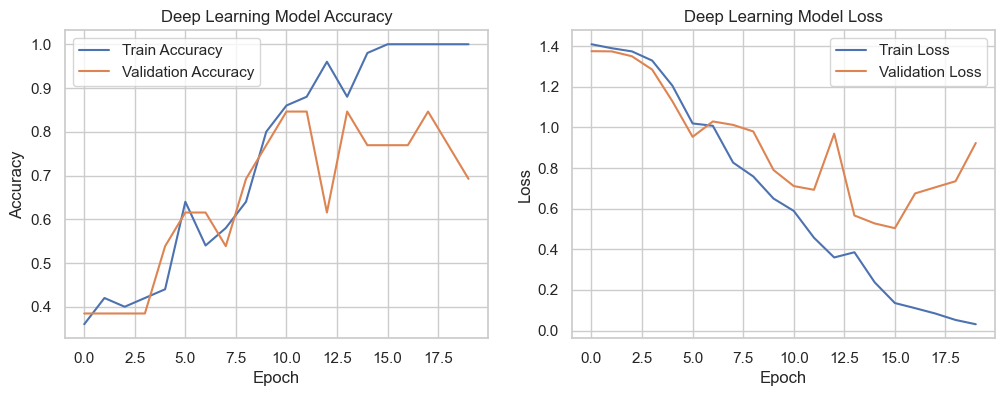

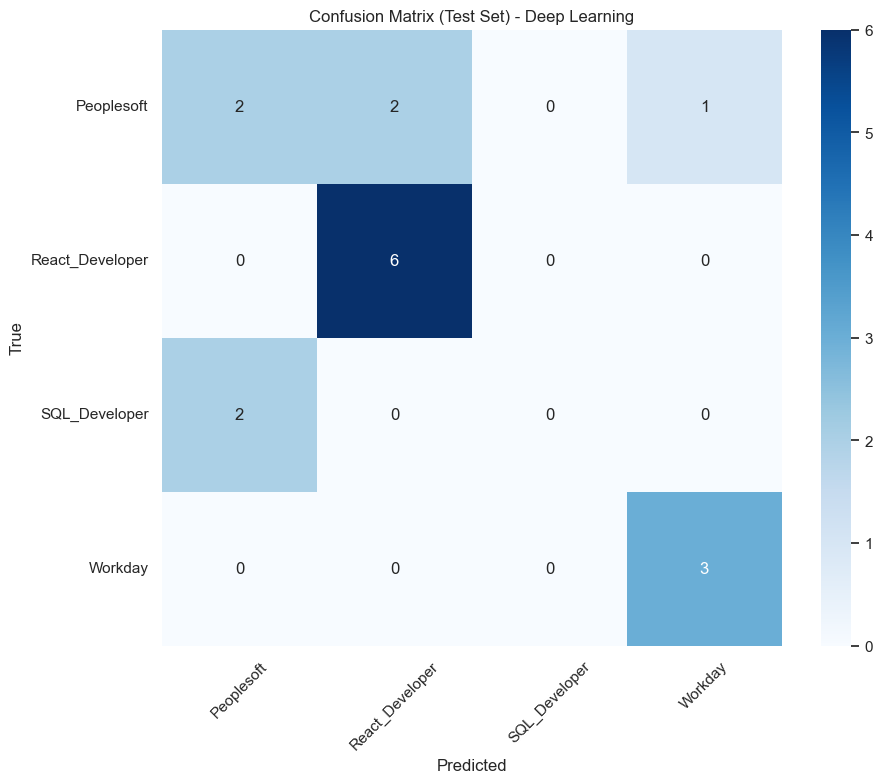


Classification Report:
                 precision    recall  f1-score   support

     Peoplesoft       0.50      0.40      0.44         5
React_Developer       0.75      1.00      0.86         6
  SQL_Developer       1.00      0.00      0.00         2
        Workday       0.75      1.00      0.86         3

       accuracy                           0.69        16
      macro avg       0.75      0.60      0.54        16
   weighted avg       0.70      0.69      0.62        16



In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate model
dl_train_loss, dl_train_accuracy = dl_model.evaluate(dl_x_train, dl_y_train, verbose=0)
dl_test_loss, dl_test_accuracy = dl_model.evaluate(dl_x_test, dl_y_test, verbose=0)
print(f"\nTrain Accuracy: {dl_train_accuracy * 100:.2f}%")
print(f"\nTest Accuracy: {dl_test_accuracy * 100:.2f}%")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(dl_history.history['accuracy'], label='Train Accuracy')
plt.plot(dl_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Deep Learning Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(dl_history.history['loss'], label='Train Loss')
plt.plot(dl_history.history['val_loss'], label='Validation Loss')
plt.title('Deep Learning Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
dl_y_pred = np.argmax(dl_model.predict(dl_x_test, verbose=0), axis=1)
dl_y_test_classes = np.argmax(dl_y_test, axis=1)

dl_cm = confusion_matrix(dl_y_test_classes, dl_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(dl_cm, annot=True, fmt='d', cmap='Blues', xticklabels=dl_label_encoder.classes_, yticklabels=dl_label_encoder.classes_)
plt.title('Confusion Matrix (Test Set) - Deep Learning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

print("\nClassification Report:")
print(classification_report(dl_y_test_classes, dl_y_pred, target_names=dl_label_encoder.classes_, zero_division=1))



## SVM


SVM Results:
Training Accuracy: 1.0000
Testing Accuracy: 0.9375
                 precision    recall  f1-score   support

     Peoplesoft       1.00      0.80      0.89         5
React_Developer       0.86      1.00      0.92         6
  SQL_Developer       1.00      1.00      1.00         2
        Workday       1.00      1.00      1.00         3

       accuracy                           0.94        16
      macro avg       0.96      0.95      0.95        16
   weighted avg       0.95      0.94      0.94        16



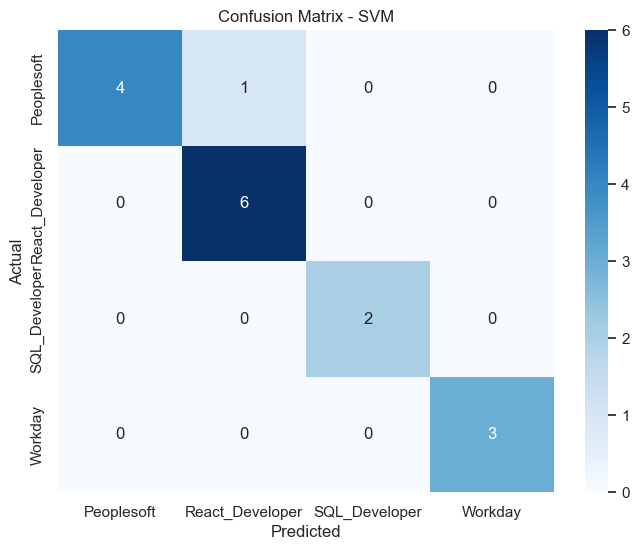

In [47]:

from sklearn.svm import SVC

# Preprocessing for SVM
svm_texts = df['Cleaned_Text']
svm_categories = df['Category']

svm_vectorizer = TfidfVectorizer(lowercase=True, max_features=5000)
svm_X = svm_vectorizer.fit_transform(svm_texts)

svm_label_encoder = LabelEncoder()
svm_y = svm_label_encoder.fit_transform(svm_categories)

svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(svm_X, svm_y, test_size=0.2, random_state=42)

# Train and Evaluate SVM Model
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(svm_X_train, svm_y_train)
svm_y_pred = svm_classifier.predict(svm_X_test)

print("\nSVM Results:")
print(f"Training Accuracy: {accuracy_score(svm_y_train, svm_classifier.predict(svm_X_train)):.4f}")
print(f"Testing Accuracy: {accuracy_score(svm_y_test, svm_y_pred):.4f}")
print(classification_report(svm_y_test, svm_y_pred, target_names=svm_label_encoder.classes_))

# Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
svm_cm = confusion_matrix(svm_y_test, svm_y_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_label_encoder.classes_, yticklabels=svm_label_encoder.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Random Forest Classifier


Random Forest Results:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React_Developer       1.00      1.00      1.00         6
  SQL_Developer       1.00      1.00      1.00         2
        Workday       1.00      1.00      1.00         3

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16



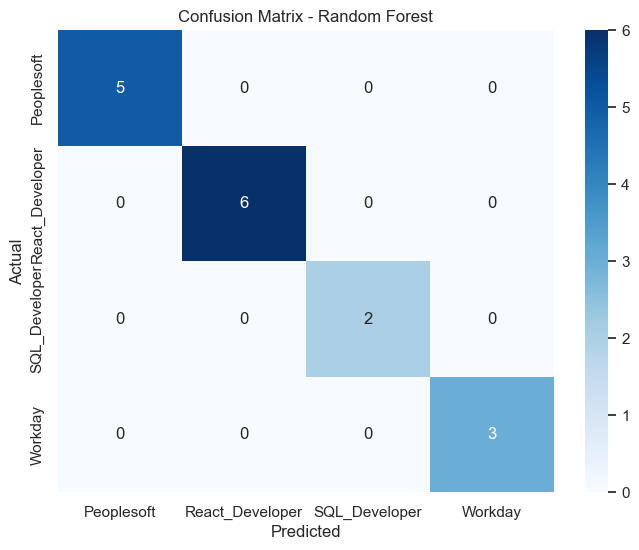

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Preprocessing for Random Forest
rf_texts = df['Cleaned_Text']
rf_categories = df['Category']

rf_vectorizer = TfidfVectorizer(lowercase=True, max_features=5000)
rf_X = rf_vectorizer.fit_transform(rf_texts)

rf_label_encoder = LabelEncoder()
rf_y = rf_label_encoder.fit_transform(rf_categories)

rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.2, random_state=42)

# Train and Evaluate Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(rf_X_train, rf_y_train)
rf_y_pred = rf_classifier.predict(rf_X_test)

print("\nRandom Forest Results:")
print(f"Training Accuracy: {accuracy_score(rf_y_train, rf_classifier.predict(rf_X_train)):.4f}")
print(f"Testing Accuracy: {accuracy_score(rf_y_test, rf_y_pred):.4f}")
print(classification_report(rf_y_test, rf_y_pred, target_names=rf_label_encoder.classes_))

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
rf_cm = confusion_matrix(rf_y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_label_encoder.classes_, yticklabels=rf_label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Naïve Bayes (MultinomialNB)


Naïve Bayes Results:
Training Accuracy: 1.0000
Testing Accuracy: 0.9375
                 precision    recall  f1-score   support

     Peoplesoft       1.00      0.80      0.89         5
React_Developer       1.00      1.00      1.00         6
  SQL_Developer       1.00      1.00      1.00         2
        Workday       0.75      1.00      0.86         3

       accuracy                           0.94        16
      macro avg       0.94      0.95      0.94        16
   weighted avg       0.95      0.94      0.94        16



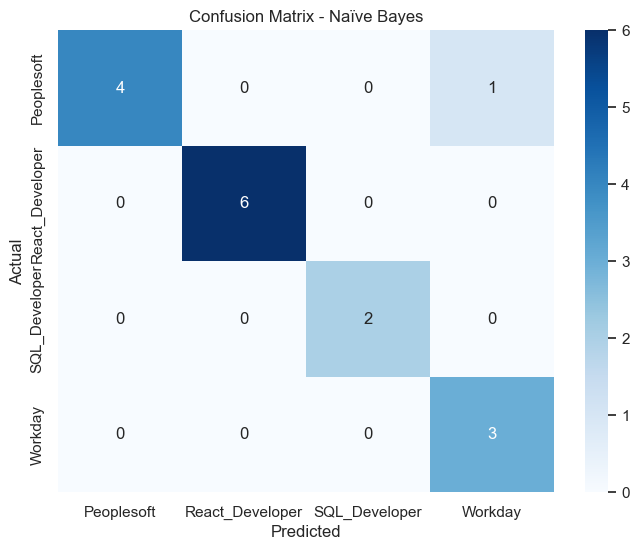

In [49]:
from sklearn.naive_bayes import MultinomialNB

# Preprocessing for Naïve Bayes
nb_texts = df['Cleaned_Text']
nb_categories = df['Category']

nb_vectorizer = TfidfVectorizer(lowercase=True, max_features=5000)
nb_X = nb_vectorizer.fit_transform(nb_texts)

nb_label_encoder = LabelEncoder()
nb_y = nb_label_encoder.fit_transform(nb_categories)

nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(nb_X, nb_y, test_size=0.2, random_state=42)

# Train and Evaluate Naïve Bayes Model
nb_classifier = MultinomialNB()
nb_classifier.fit(nb_X_train, nb_y_train)
nb_y_pred = nb_classifier.predict(nb_X_test)

print("\nNaïve Bayes Results:")
print(f"Training Accuracy: {accuracy_score(nb_y_train, nb_classifier.predict(nb_X_train)):.4f}")
print(f"Testing Accuracy: {accuracy_score(nb_y_test, nb_y_pred):.4f}")
print(classification_report(nb_y_test, nb_y_pred, target_names=nb_label_encoder.classes_))

# Confusion Matrix for Naïve Bayes
plt.figure(figsize=(8, 6))
nb_cm = confusion_matrix(nb_y_test, nb_y_pred)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_label_encoder.classes_, yticklabels=nb_label_encoder.classes_)
plt.title('Confusion Matrix - Naïve Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## XGBoost Classifier


XGBoost Results:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React_Developer       1.00      1.00      1.00         6
  SQL_Developer       1.00      1.00      1.00         2
        Workday       1.00      1.00      1.00         3

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16



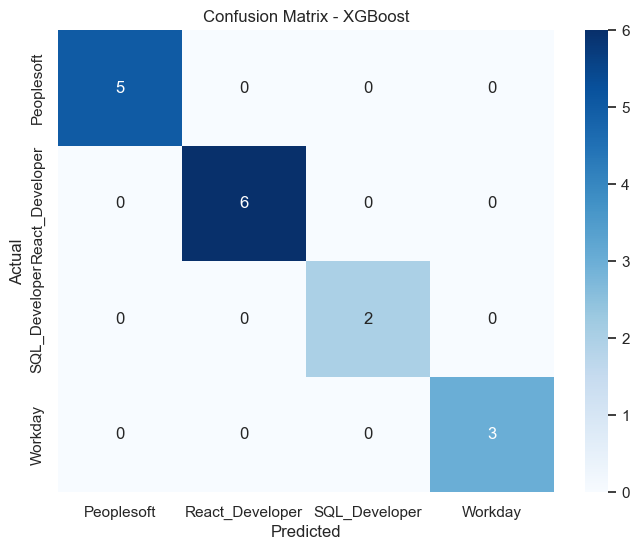

In [50]:
import xgboost as xgb

# Preprocessing for XGBoost
xgb_texts = df['Cleaned_Text']
xgb_categories = df['Category']

xgb_vectorizer = TfidfVectorizer(lowercase=True, max_features=5000)
xgb_X = xgb_vectorizer.fit_transform(xgb_texts)

xgb_label_encoder = LabelEncoder()
xgb_y = xgb_label_encoder.fit_transform(xgb_categories)

xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(xgb_X, xgb_y, test_size=0.2, random_state=42)

# Train and Evaluate XGBoost Model
xgb_classifier = xgb.XGBClassifier( eval_metric='mlogloss')
xgb_classifier.fit(xgb_X_train, xgb_y_train)
xgb_y_pred = xgb_classifier.predict(xgb_X_test)

print("\nXGBoost Results:")
print(f"Training Accuracy: {accuracy_score(xgb_y_train, xgb_classifier.predict(xgb_X_train)):.4f}")
print(f"Testing Accuracy: {accuracy_score(xgb_y_test, xgb_y_pred):.4f}")
print(classification_report(xgb_y_test, xgb_y_pred, target_names=xgb_label_encoder.classes_))

# Confusion Matrix for XGBoost
plt.figure(figsize=(8, 6))
xgb_cm = confusion_matrix(xgb_y_test, xgb_y_pred)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_label_encoder.classes_, yticklabels=xgb_label_encoder.classes_)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##  K-Nearest Neighbors (KNN)


K-Nearest Neighbors (KNN) Results:
Training Accuracy: 0.9683
Testing Accuracy: 1.0000
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React_Developer       1.00      1.00      1.00         6
  SQL_Developer       1.00      1.00      1.00         2
        Workday       1.00      1.00      1.00         3

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16



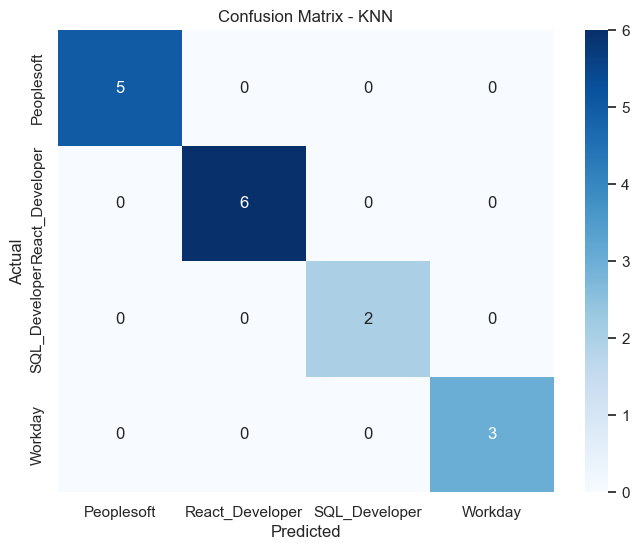

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing for KNN
knn_texts = df['Cleaned_Text']
knn_categories = df['Category']

knn_vectorizer = TfidfVectorizer(lowercase=True, max_features=5000)
knn_X = knn_vectorizer.fit_transform(knn_texts)

knn_label_encoder = LabelEncoder()
knn_y = knn_label_encoder.fit_transform(knn_categories)

knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, test_size=0.2, random_state=42)

# Train and Evaluate KNN Model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(knn_X_train, knn_y_train)
knn_y_pred = knn_classifier.predict(knn_X_test)

print("\nK-Nearest Neighbors (KNN) Results:")
print(f"Training Accuracy: {accuracy_score(knn_y_train, knn_classifier.predict(knn_X_train)):.4f}")
print(f"Testing Accuracy: {accuracy_score(knn_y_test, knn_y_pred):.4f}")
print(classification_report(knn_y_test, knn_y_pred, target_names=knn_label_encoder.classes_))

# Confusion Matrix for KNN
plt.figure(figsize=(8, 6))
knn_cm = confusion_matrix(knn_y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_label_encoder.classes_, yticklabels=knn_label_encoder.classes_)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Gradient Boosting Classifier


Gradient Boosting (GB) Results:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React_Developer       1.00      1.00      1.00         6
  SQL_Developer       1.00      1.00      1.00         2
        Workday       1.00      1.00      1.00         3

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16



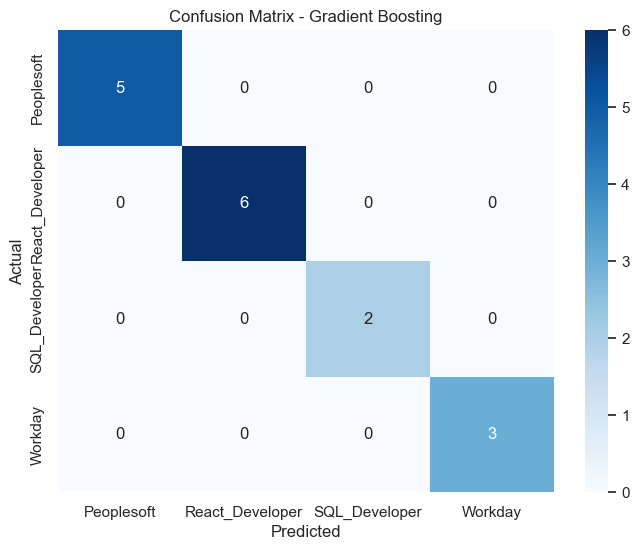

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# Preprocessing for Gradient Boosting
gb_texts = df['Cleaned_Text']
gb_categories = df['Category']

gb_vectorizer = TfidfVectorizer(lowercase=True, max_features=5000)
gb_X = gb_vectorizer.fit_transform(gb_texts)

gb_label_encoder = LabelEncoder()
gb_y = gb_label_encoder.fit_transform(gb_categories)

gb_X_train, gb_X_test, gb_y_train, gb_y_test = train_test_split(gb_X, gb_y, test_size=0.2, random_state=42)

# Train and Evaluate Gradient Boosting Model
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(gb_X_train, gb_y_train)
gb_y_pred = gb_classifier.predict(gb_X_test)

print("\nGradient Boosting (GB) Results:")
print(f"Training Accuracy: {accuracy_score(gb_y_train, gb_classifier.predict(gb_X_train)):.4f}")
print(f"Testing Accuracy: {accuracy_score(gb_y_test, gb_y_pred):.4f}")
print(classification_report(gb_y_test, gb_y_pred, target_names=gb_label_encoder.classes_))

# Confusion Matrix for GB
plt.figure(figsize=(8, 6))
gb_cm = confusion_matrix(gb_y_test, gb_y_pred)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=gb_label_encoder.classes_, yticklabels=gb_label_encoder.classes_)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Final Comparison

In [53]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Convert One-Hot Encoded Labels to Class Labels for Deep Learning
dl_y_train_classes = dl_y_train.argmax(axis=1)
dl_y_test_classes = dl_y_test.argmax(axis=1)

# Store accuracy results in a dictionary
accuracy_results = {
    "Algorithm": [
        "One-vs-Rest (OvR)", "Deep Learning", "SVM", "Random Forest", 
        "Naïve Bayes", "XGBoost", "KNN", "Gradient Boosting"
    ],
    "Training Accuracy": [
        accuracy_score(ovr_y_train, ovr_classifier.predict(ovr_X_train)),  # OvR Training Accuracy
        accuracy_score(dl_y_train_classes, dl_model.predict(dl_x_train).argmax(axis=1)),  # DL Training Accuracy
        accuracy_score(svm_y_train, svm_classifier.predict(svm_X_train)),
        accuracy_score(rf_y_train, rf_classifier.predict(rf_X_train)),
        accuracy_score(nb_y_train, nb_classifier.predict(nb_X_train)),
        accuracy_score(xgb_y_train, xgb_classifier.predict(xgb_X_train)),
        accuracy_score(knn_y_train, knn_classifier.predict(knn_X_train)),
        accuracy_score(gb_y_train, gb_classifier.predict(gb_X_train))
    ],
    "Testing Accuracy": [
        accuracy_score(ovr_y_test, ovr_classifier.predict(ovr_X_test)),  # OvR Testing Accuracy
        accuracy_score(dl_y_test_classes, dl_model.predict(dl_x_test).argmax(axis=1)),  # DL Testing Accuracy
        accuracy_score(svm_y_test, svm_y_pred),
        accuracy_score(rf_y_test, rf_y_pred),
        accuracy_score(nb_y_test, nb_y_pred),
        accuracy_score(xgb_y_test, xgb_y_pred),
        accuracy_score(knn_y_test, knn_y_pred),
        accuracy_score(gb_y_test, gb_y_pred)
    ]
}

# Convert dictionary to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Display the DataFrame
print("\nModel Accuracy Comparison:")
accuracy_df



1/1 [==============================] - 0s 82ms/step

Model Accuracy Comparison:


Algorithm  Training Accuracy  Testing Accuracy
0  One-vs-Rest (OvR)           1.000000            0.9375
1      Deep Learning           0.936508            0.6875
2                SVM           1.000000            0.9375
3      Random Forest           1.000000            1.0000
4        Naïve Bayes           1.000000            0.9375
5            XGBoost           1.000000            1.0000
6                KNN           0.968254            1.0000
7  Gradient Boosting           1.000000            1.0000

## Sorted

In [54]:
# Sort by Training Accuracy first, then Testing Accuracy (both in descending order)
accuracy_df_sorted = accuracy_df.sort_values(by=["Training Accuracy", "Testing Accuracy"], ascending=[False, False])

# Display the sorted DataFrame
print("\nModel Accuracy Comparison (Sorted by Training & Testing Accuracy):")
accuracy_df_sorted


Model Accuracy Comparison (Sorted by Training & Testing Accuracy):


Algorithm  Training Accuracy  Testing Accuracy
3      Random Forest           1.000000            1.0000
5            XGBoost           1.000000            1.0000
7  Gradient Boosting           1.000000            1.0000
0  One-vs-Rest (OvR)           1.000000            0.9375
2                SVM           1.000000            0.9375
4        Naïve Bayes           1.000000            0.9375
6                KNN           0.968254            1.0000
1      Deep Learning           0.936508            0.6875

In [55]:
df['Category'].value_counts()

React_Developer    24
Workday            21
Peoplesoft         20
SQL_Developer      14
Name: Category, dtype: int64

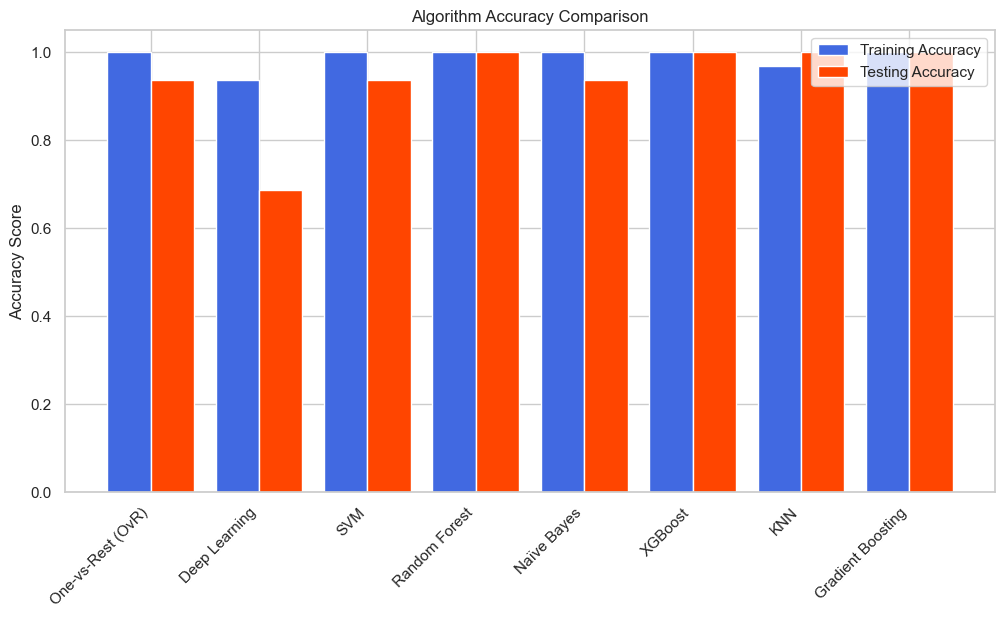

1/1 [==============================] - 0s 133ms/step


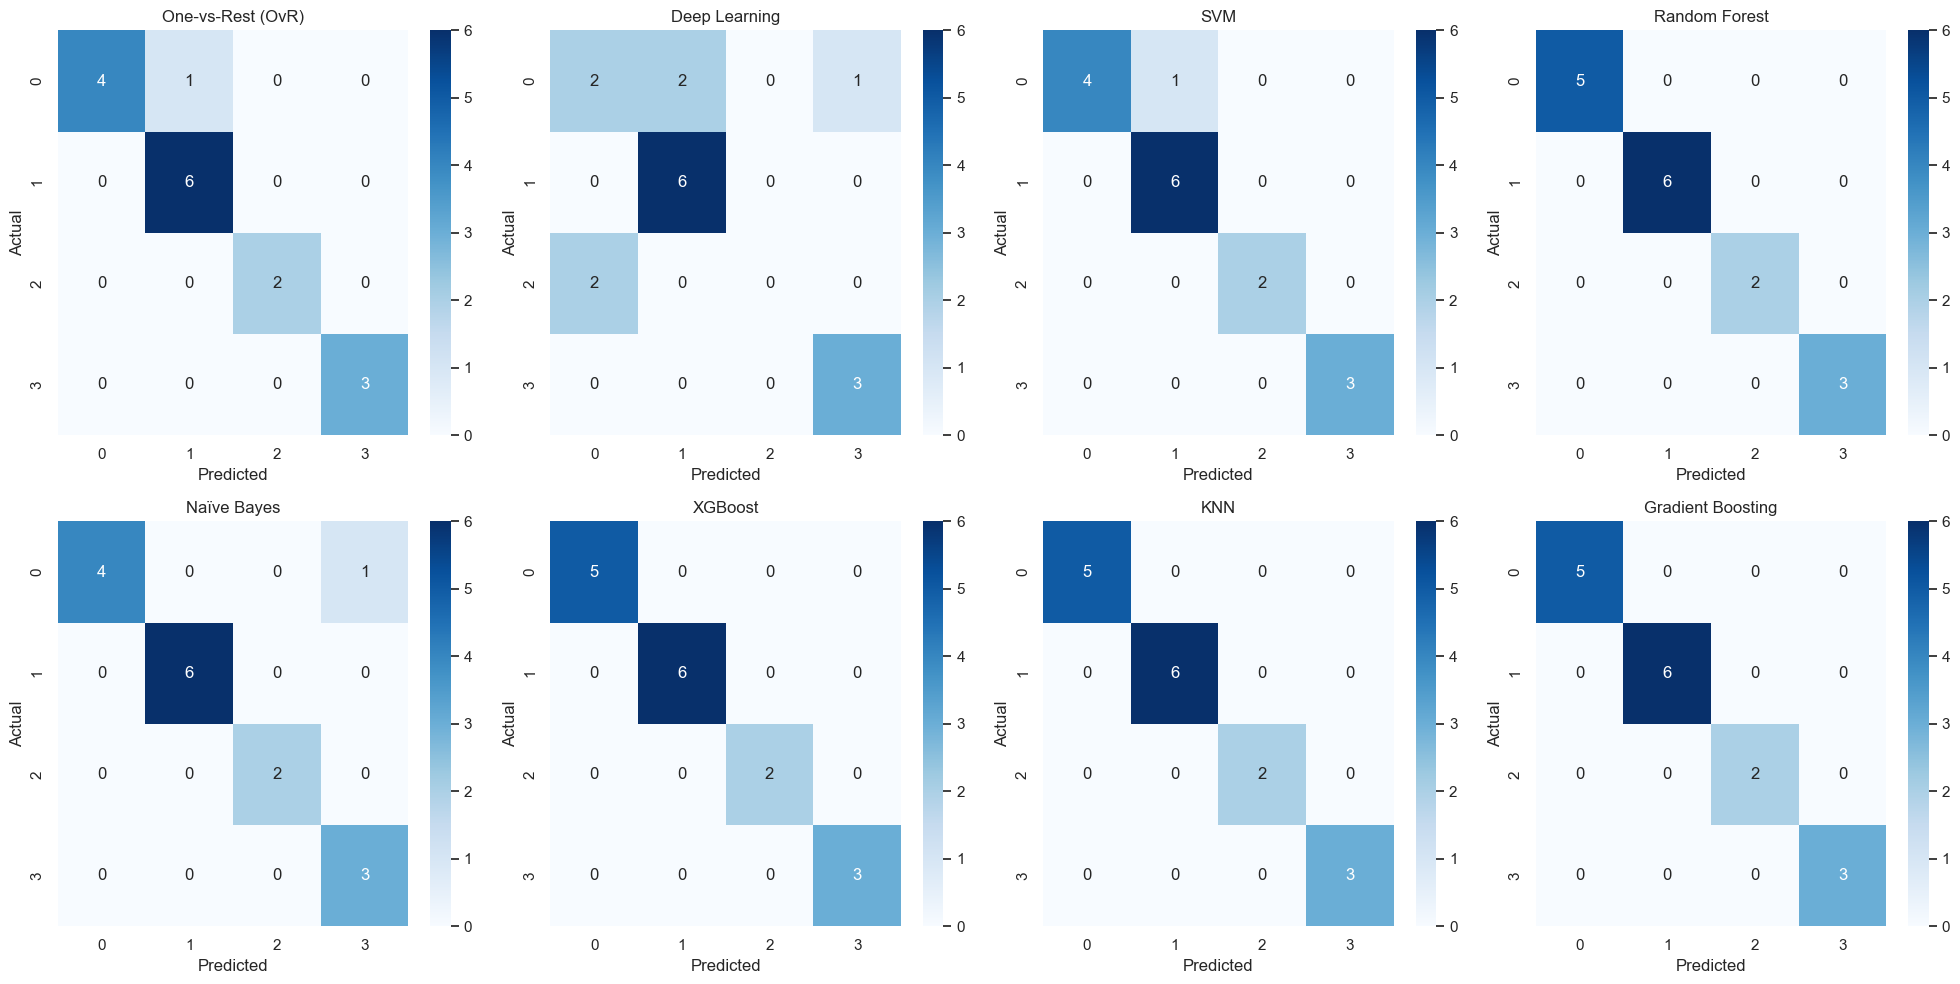

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for plots
sns.set_style("whitegrid")

# Bar Plot for Accuracy Comparison
plt.figure(figsize=(12, 6))
x_labels = accuracy_df["Algorithm"]
x_indexes = np.arange(len(x_labels))

plt.bar(x_indexes - 0.2, accuracy_df["Training Accuracy"], width=0.4, label="Training Accuracy", color='royalblue')
plt.bar(x_indexes + 0.2, accuracy_df["Testing Accuracy"], width=0.4, label="Testing Accuracy", color='orangered')

plt.xticks(x_indexes, x_labels, rotation=45, ha="right")
plt.ylabel("Accuracy Score")
plt.title("Algorithm Accuracy Comparison")
plt.legend()
plt.show()

# Confusion Matrices for Each Algorithm
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns

conf_matrices = {
    "One-vs-Rest (OvR)": confusion_matrix(ovr_y_test, ovr_y_test_pred),
    "Deep Learning": confusion_matrix(dl_y_test_classes, dl_model.predict(dl_x_test).argmax(axis=1)),
    "SVM": confusion_matrix(svm_y_test, svm_y_pred),
    "Random Forest": confusion_matrix(rf_y_test, rf_y_pred),
    "Naïve Bayes": confusion_matrix(nb_y_test, nb_y_pred),
    "XGBoost": confusion_matrix(xgb_y_test, xgb_y_pred),
    "KNN": confusion_matrix(knn_y_test, knn_y_pred),
    "Gradient Boosting": confusion_matrix(gb_y_test, gb_y_pred),
}

for ax, (model, cm) in zip(axes.flatten(), conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


## Hyperparameter Tuning

## RF

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest Results after Hyperparameter Tuning:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React_Developer       1.00      1.00      1.00         6
  SQL_Developer       1.00      1.00      1.00         2
        Workday       1.00      1.00      1.00         3

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16



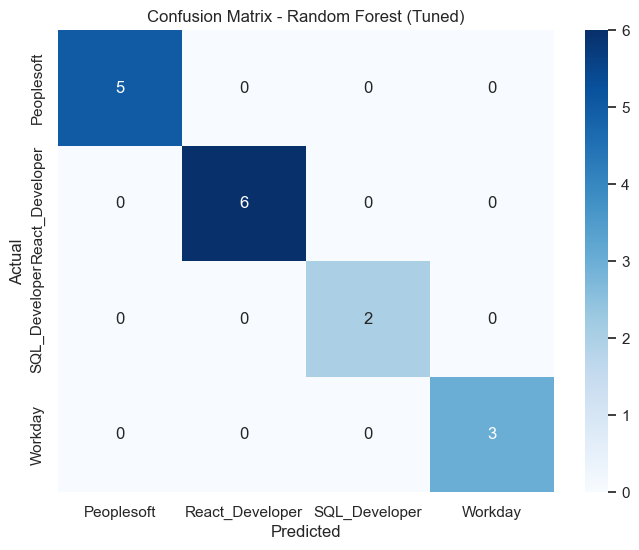

In [68]:


from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing for Random Forest with different variable names
rf_texts_train = df['Cleaned_Text']
rf_labels_train = df['Category']

# Vectorization using TF-IDF
rf_vectorizer = TfidfVectorizer(lowercase=True, max_features=5000)
rf_X_train_vec = rf_vectorizer.fit_transform(rf_texts_train)

# Encoding labels
rf_label_encoder = LabelEncoder()
rf_y_train_encoded = rf_label_encoder.fit_transform(rf_labels_train)

# Splitting the dataset into training and testing sets
rf_X_train_final, rf_X_test_final, rf_y_train_final, rf_y_test_final = train_test_split(
    rf_X_train_vec, rf_y_train_encoded, test_size=0.2, random_state=42
)

# Defining the RandomForestClassifier and hyperparameters for tuning
rf_param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Valid values for max_features
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Using GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf_model, 
    param_grid=rf_param_grid, 
    cv=5,  # Cross-validation with 5 folds
    n_jobs=-1, 
    verbose=2
)

# Fit the grid search to the data
grid_search_rf.fit(rf_X_train_final, rf_y_train_final)

# Best parameters from GridSearchCV
best_params = grid_search_rf.best_params_
print(f"Best Hyperparameters: {best_params}")

# Retrain the model with the best parameters
best_rf_model = grid_search_rf.best_estimator_

# Predicting the results with the best model
rf_y_pred_final = best_rf_model.predict(rf_X_test_final)

# Evaluating the performance
print("\nRandom Forest Results after Hyperparameter Tuning:")
print(f"Training Accuracy: {accuracy_score(rf_y_train_final, best_rf_model.predict(rf_X_train_final)):.4f}")
print(f"Testing Accuracy: {accuracy_score(rf_y_test_final, rf_y_pred_final):.4f}")
print(classification_report(rf_y_test_final, rf_y_pred_final, target_names=rf_label_encoder.classes_))

# Confusion Matrix after Hyperparameter Tuning
plt.figure(figsize=(8, 6))
rf_cm_final = confusion_matrix(rf_y_test_final, rf_y_pred_final)
sns.heatmap(rf_cm_final, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_label_encoder.classes_, 
            yticklabels=rf_label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [63]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, rf_X_train_final, rf_y_train_final, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000, Std Dev: 0.0000


Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20, 'subsample': 0.8}

XGBoost Results after Hyperparameter Tuning:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React_Developer       1.00      1.00      1.00         6
  SQL_Developer       1.00      1.00      1.00         2
        Workday       1.00      1.00      1.00         3

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16



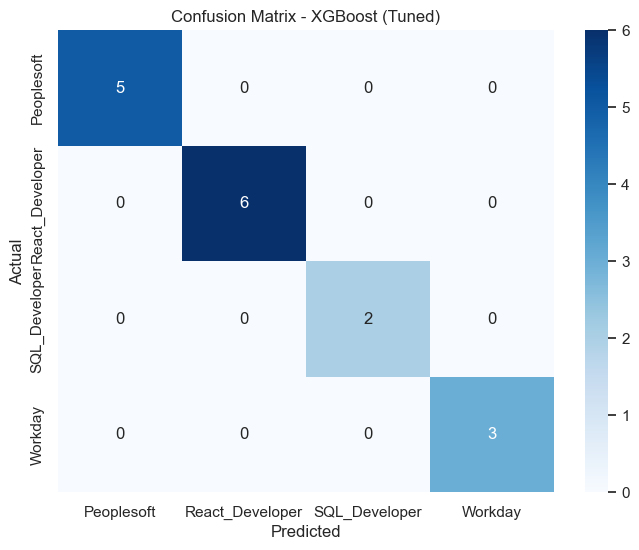

In [66]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
xgb_texts = df['Cleaned_Text']
xgb_categories = df['Category']

# TF-IDF Vectorization
xgb_vectorizer = TfidfVectorizer(lowercase=True, max_features=5000)
xgb_X = xgb_vectorizer.fit_transform(xgb_texts)

# Encoding Labels
xgb_label_encoder = LabelEncoder()
xgb_y = xgb_label_encoder.fit_transform(xgb_categories)

# Splitting Data
xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = train_test_split(
    xgb_X, xgb_y, test_size=0.2, random_state=42
)

# 🔹 Simplified XGBoost Hyperparameter Grid
xgb_param_grid = {
    'n_estimators': [20, 10,50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.8, 1.0],  # Fraction of samples used for training
    'colsample_bytree': [0.8, 1.0]  # Fraction of features used per tree
}

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)

# Grid Search with 3-Fold Cross-Validation
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=3,  # 3-fold CV for efficiency
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

# Fit GridSearchCV
grid_search_xgb.fit(xgb_X_train, xgb_y_train)

# Best Parameters
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Hyperparameters: {best_xgb_params}")

# Train Best Model
best_xgb_model = grid_search_xgb.best_estimator_

# Predictions
xgb_y_pred = best_xgb_model.predict(xgb_X_test)

# Evaluation
print("\nXGBoost Results after Hyperparameter Tuning:")
print(f"Training Accuracy: {accuracy_score(xgb_y_train, best_xgb_model.predict(xgb_X_train)):.4f}")
print(f"Testing Accuracy: {accuracy_score(xgb_y_test, xgb_y_pred):.4f}")
print(classification_report(xgb_y_test, xgb_y_pred, target_names=xgb_label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
xgb_cm = confusion_matrix(xgb_y_test, xgb_y_pred)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=xgb_label_encoder.classes_, 
            yticklabels=xgb_label_encoder.classes_)
plt.title('Confusion Matrix - XGBoost (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## GD

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

Gradient Boosting (GB) Results after Hyperparameter Tuning:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React_Developer       1.00      1.00      1.00         6
  SQL_Developer       1.00      1.00      1.00         2
        Workday       1.00      1.00      1.00         3

       accuracy                           1.00        16
      macro avg       1.00      1.00      1.00        16
   weighted avg       1.00      1.00      1.00        16



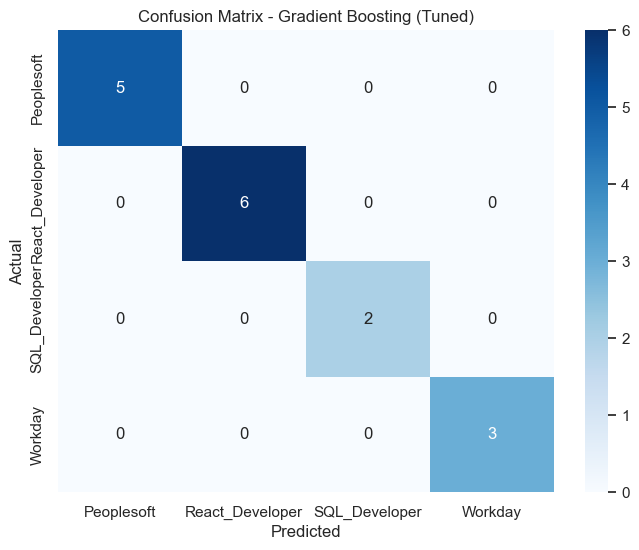

In [69]:


# Preprocessing
gb_texts = df['Cleaned_Text']
gb_categories = df['Category']

# TF-IDF Vectorization
gb_vectorizer = TfidfVectorizer(lowercase=True, max_features=5000)
gb_X = gb_vectorizer.fit_transform(gb_texts)

# Encoding Labels
gb_label_encoder = LabelEncoder()
gb_y = gb_label_encoder.fit_transform(gb_categories)

# Splitting Data
gb_X_train, gb_X_test, gb_y_train, gb_y_test = train_test_split(
    gb_X, gb_y, test_size=0.2, random_state=42
)

# 🔹 Simplified Gradient Boosting Hyperparameter Grid
gb_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'subsample': [0.8, 1.0]  # Fraction of samples used for training
}

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Grid Search with 3-Fold Cross-Validation
grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=gb_param_grid,
    cv=3,  # 3-fold CV for efficiency
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

# Fit GridSearchCV
grid_search_gb.fit(gb_X_train, gb_y_train)

# Best Parameters
best_gb_params = grid_search_gb.best_params_
print(f"Best Hyperparameters: {best_gb_params}")

# Train Best Model
best_gb_model = grid_search_gb.best_estimator_

# Predictions
gb_y_pred = best_gb_model.predict(gb_X_test)

# Evaluation
print("\nGradient Boosting (GB) Results after Hyperparameter Tuning:")
print(f"Training Accuracy: {accuracy_score(gb_y_train, best_gb_model.predict(gb_X_train)):.4f}")
print(f"Testing Accuracy: {accuracy_score(gb_y_test, gb_y_pred):.4f}")
print(classification_report(gb_y_test, gb_y_pred, target_names=gb_label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
gb_cm = confusion_matrix(gb_y_test, gb_y_pred)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=gb_label_encoder.classes_, 
            yticklabels=gb_label_encoder.classes_)
plt.title('Confusion Matrix - Gradient Boosting (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [71]:

# Store results in a dictionary
results_data = {
    "Model": ["Random Forest", "XGBoost", "Gradient Boosting"],
    "Best Parameters": [best_params, best_xgb_params, best_gb_params],  # Assuming best_gb_params for GB
    "Training Accuracy": [
        accuracy_score(rf_y_train_final, best_rf_model.predict(rf_X_train_final)),
        accuracy_score(xgb_y_train, best_xgb_model.predict(xgb_X_train)),
        accuracy_score(gb_y_train, best_gb_model.predict(gb_X_train))
    ],
    "Testing Accuracy": [
        accuracy_score(rf_y_test_final, rf_y_pred_final),
        accuracy_score(xgb_y_test, xgb_y_pred),
        accuracy_score(gb_y_test, gb_y_pred)
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results_data)


print("Results DataFrame created and saved as 'model_results.csv'!")
results_df


Results DataFrame created and saved as 'model_results.csv'!


Model  \
0      Random Forest   
1            XGBoost   
2  Gradient Boosting   

                                                                                                 Best Parameters  \
0  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}   
1          {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20, 'subsample': 0.8}   
2                                  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}   

   Training Accuracy  Testing Accuracy  
0                1.0               1.0  
1                1.0               1.0  
2                1.0               1.0

In [70]:
import joblib

# Save the trained XGBoost model
joblib.dump(best_xgb_model, 'xgb_resume_classifier.pkl')

# Save the TF-IDF Vectorizer
joblib.dump(xgb_vectorizer, 'tfidf_vectorizer.pkl')

# Save the Label Encoder
joblib.dump(xgb_label_encoder, 'label_encoder.pkl')

print("Model, vectorizer, and label encoder saved successfully!")


Model, vectorizer, and label encoder saved successfully!
